In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [32]:
#Load the Dataset
df=pd.read_csv("realistic_kraljic_dataset.csv")

In [33]:
df

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic
...,...,...,...,...,...,...,...,...,...,...,...
995,P996,Printer Ink,Global,19,19648,10.20,2,1,1,No,Non-Critical
996,P997,Cleaning Supplies,Global,21,19143,15.30,1,2,1,No,Non-Critical
997,P998,Uniforms,Global,70,5352,30.23,1,3,2,No,Non-Critical
998,P999,Printer Ink,Global,44,18070,30.73,1,1,2,No,Non-Critical


In [34]:
#display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   object 
 1   Product_Name          1000 non-null   object 
 2   Supplier_Region       1000 non-null   object 
 3   Lead_Time_Days        1000 non-null   int64  
 4   Order_Volume_Units    1000 non-null   int64  
 5   Cost_per_Unit         1000 non-null   float64
 6   Supply_Risk_Score     1000 non-null   int64  
 7   Profit_Impact_Score   1000 non-null   int64  
 8   Environmental_Impact  1000 non-null   int64  
 9   Single_Source_Risk    1000 non-null   object 
 10  Kraljic_Category      1000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [35]:
#Display statistical information
df.describe()

,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,47.508000,4753.182000,169.390440,2.988000,3.024000,2.778000
std,23.630454,5625.105273,132.104809,1.537602,1.542661,1.392356
min,7.000000,50.000000,10.090000,1.000000,1.000000,1.000000
25%,27.000000,363.000000,50.460000,1.000000,2.000000,2.000000
50%,48.000000,1105.500000,130.640000,3.000000,3.000000,2.500000
75%,67.000000,8111.750000,255.165000,4.250000,5.000000,4.000000
max,89.000000,19940.000000,499.320000,5.000000,5.000000,5.000000


In [36]:
df.columns

Index(['Product_ID', 'Product_Name', 'Supplier_Region', 'Lead_Time_Days',
       'Order_Volume_Units', 'Cost_per_Unit', 'Supply_Risk_Score',
       'Profit_Impact_Score', 'Environmental_Impact', 'Single_Source_Risk',
       'Kraljic_Category'],
      dtype='object')

In [37]:
#Prepare Features (X) and Target (y)
X = df.drop(['Kraljic_Category', 'Product_ID', 'Product_Name'], axis=1)
y = df['Kraljic_Category']

In [38]:
#convert categorical text into numbers
X = pd.get_dummies(X, columns=['Supplier_Region', 'Single_Source_Risk'], drop_first=True)

In [39]:
#Encode the target labels into numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [40]:
# split data into training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [41]:
#Initialize and Train the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [42]:
# Make Predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [43]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Model Accuracy: 99.50%

Classification Report:
              precision    recall  f1-score   support

  Bottleneck       0.98      1.00      0.99        52
    Leverage       1.00      1.00      1.00        55
Non-Critical       1.00      1.00      1.00        49
   Strategic       1.00      0.98      0.99        44

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [44]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 5 Most Important Factors:")
print(importances.head(5))


Top 5 Most Important Factors:
                  Feature  Importance
2           Cost_per_Unit    0.217599
1      Order_Volume_Units    0.199982
4     Profit_Impact_Score    0.174492
5    Environmental_Impact    0.166546
8  Supplier_Region_Global    0.123869


In [9]:
# Check for any missing values
missing_values = df.isnull().sum()
print(missing_values)

Product_ID              0
Product_Name            0
Supplier_Region         0
Lead_Time_Days          0
Order_Volume_Units      0
Cost_per_Unit           0
Supply_Risk_Score       0
Profit_Impact_Score     0
Environmental_Impact    0
Single_Source_Risk      0
Kraljic_Category        0
dtype: int64


C:\Users\91880\AppData\Local\Temp\ipykernel_2212\2043505762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Kraljic_Category', palette='viridis')


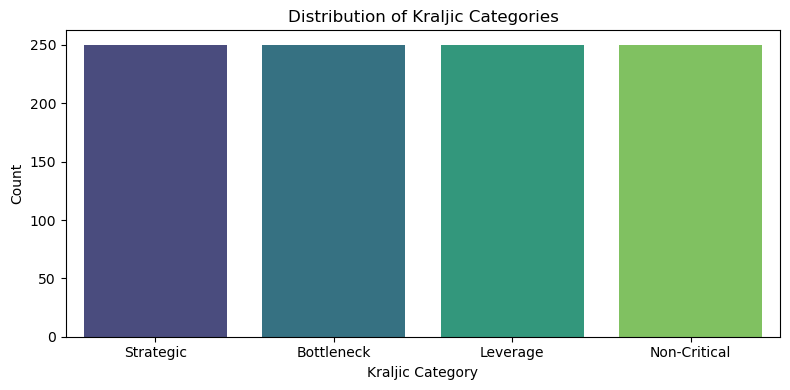

In [10]:
# Distribution of Kraljic Category
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Kraljic_Category', palette='viridis')
plt.title('Distribution of Kraljic Categories')
plt.xlabel('Kraljic Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

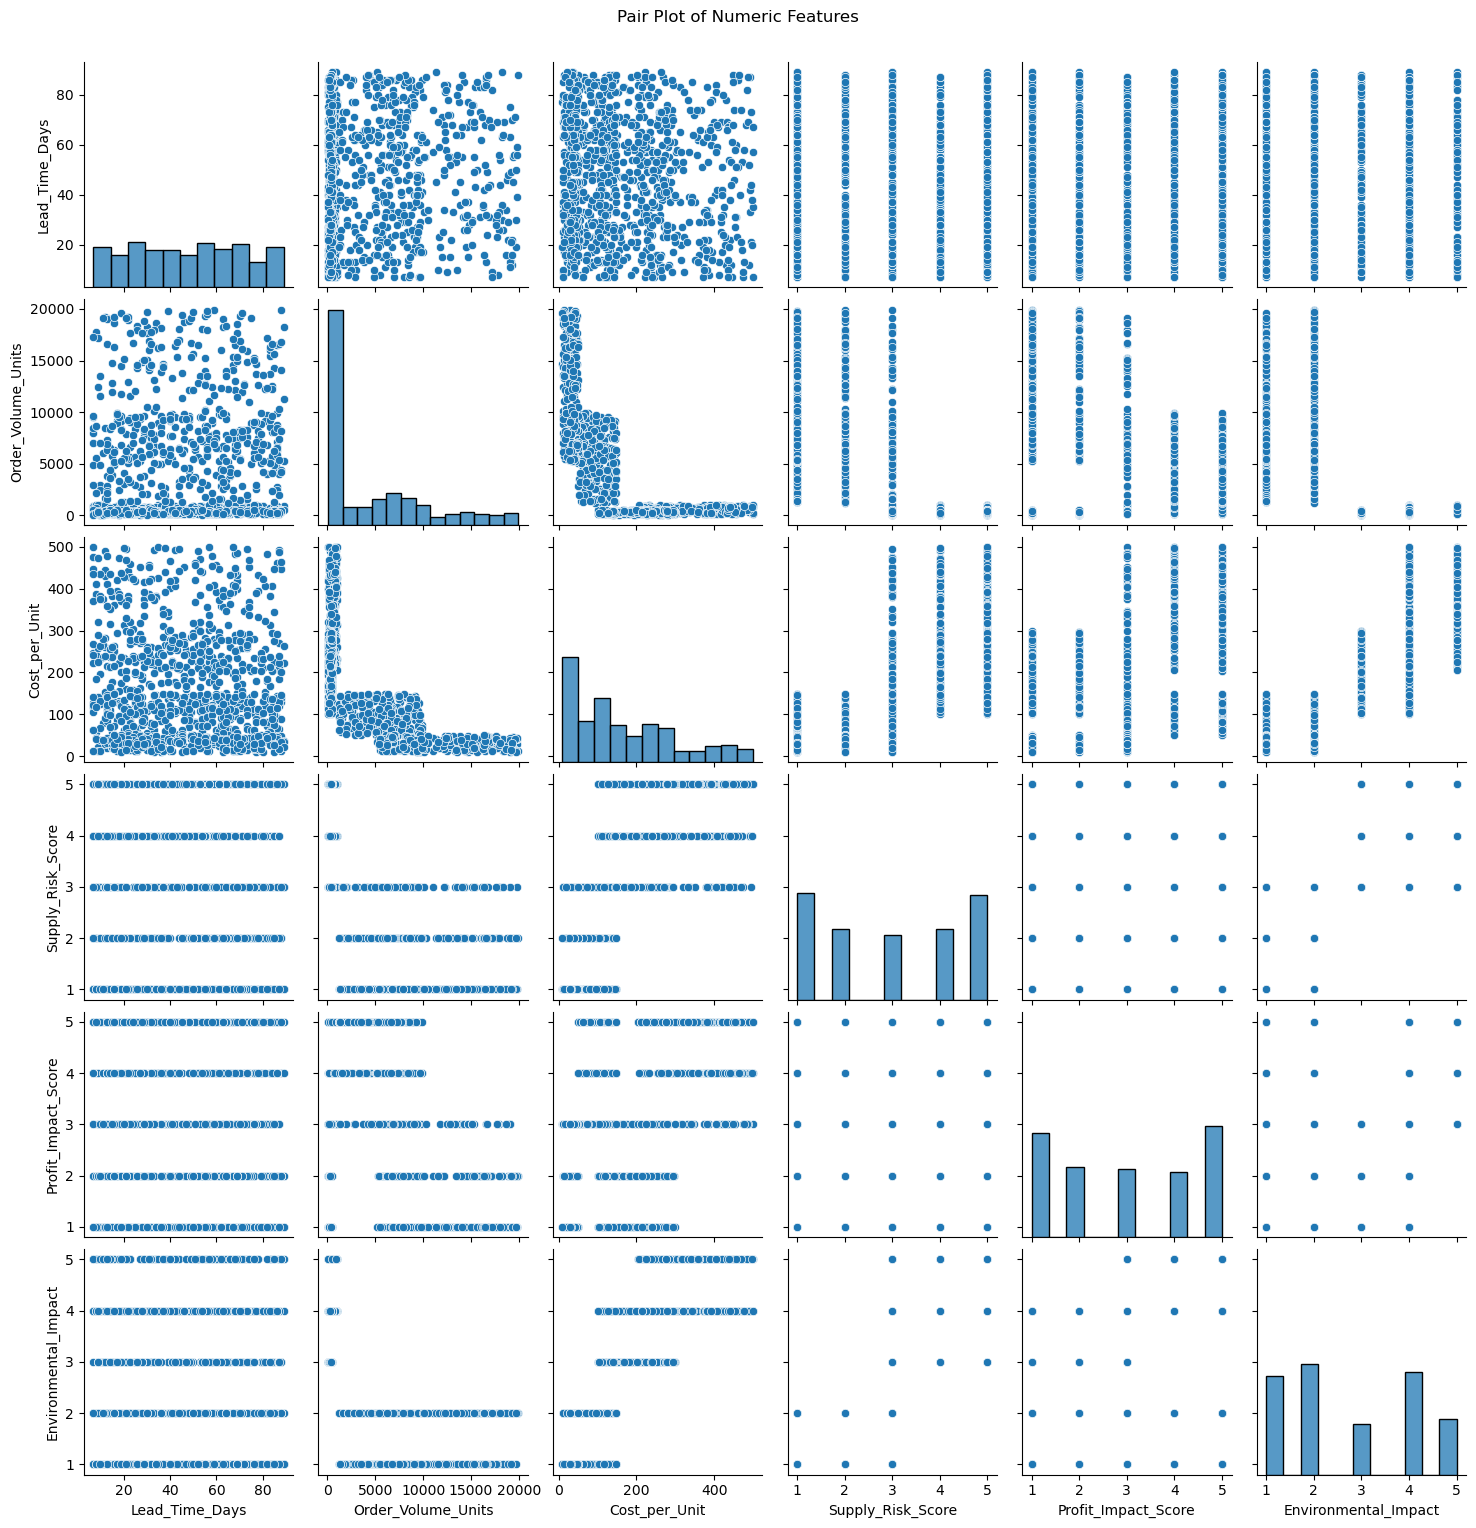

In [12]:
### Pair Plot of Numeric Features
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

C:\Users\91880\AppData\Local\Temp\ipykernel_2212\4089007447.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Kraljic_Category', y='Cost_per_Unit', palette='magma', ci=None)
C:\Users\91880\AppData\Local\Temp\ipykernel_2212\4089007447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Kraljic_Category', y='Cost_per_Unit', palette='magma', ci=None)


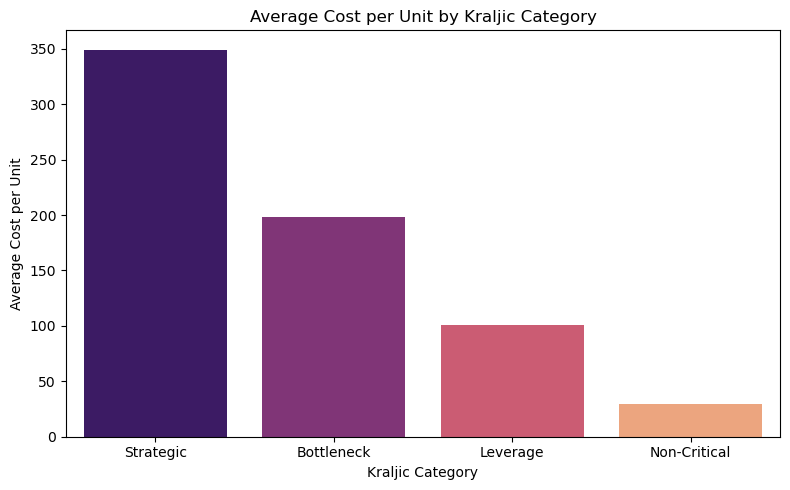

In [13]:
### Grouped Barplot: Average Cost per Unit by Kraljic Category
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Kraljic_Category', y='Cost_per_Unit', palette='magma', ci=None)
plt.title('Average Cost per Unit by Kraljic Category')
plt.xlabel('Kraljic Category')
plt.ylabel('Average Cost per Unit')
plt.tight_layout()
plt.show()


C:\Users\91880\AppData\Local\Temp\ipykernel_2212\1428938573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Supplier_Region', y='Lead_Time_Days', palette='Set2')


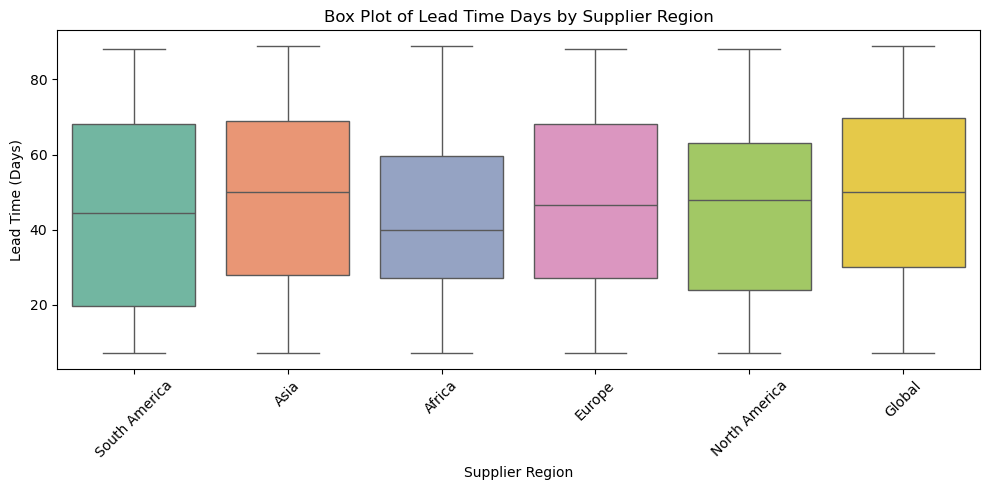

In [14]:
### Box Plot: Lead Time Days across Supplier Regions
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Supplier_Region', y='Lead_Time_Days', palette='Set2')
plt.title('Box Plot of Lead Time Days by Supplier Region')
plt.xlabel('Supplier Region')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\91880\AppData\Local\Temp\ipykernel_18972\3671441726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kraljic_Category', data=df, palette='viridis')


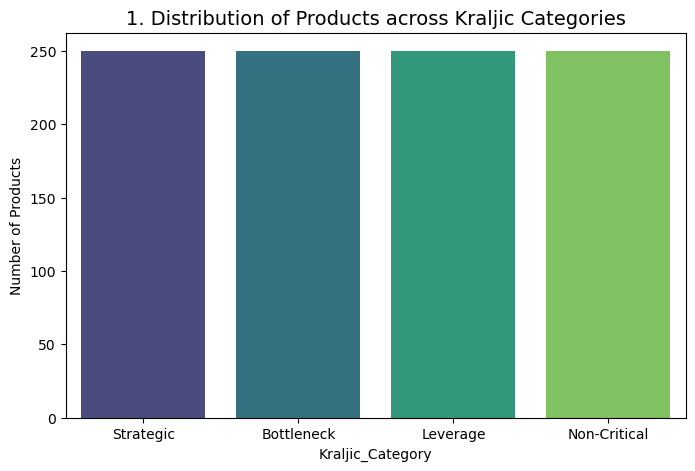

In [45]:
# --- Visualization 1: Category Balance ---
plt.figure(figsize=(8, 5))
sns.countplot(x='Kraljic_Category', data=df, palette='viridis')
plt.title('1. Distribution of Products across Kraljic Categories', fontsize=14)
plt.ylabel('Number of Products')
plt.show()

This chart shows that our dataset is perfectly balanced. We have 250 products in each of the four strategic categories.

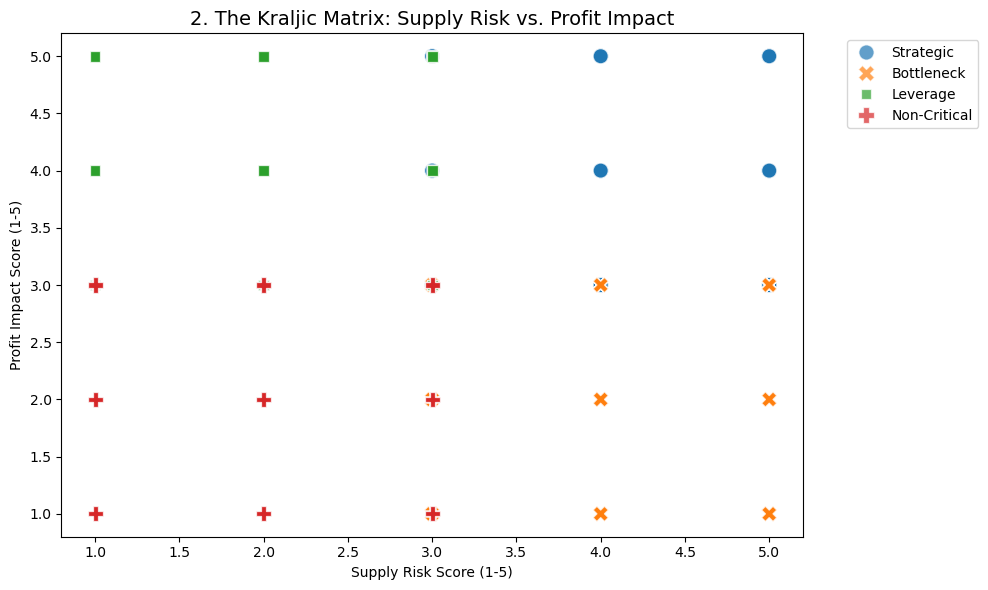

In [46]:
# --- Visualization 2: The Kraljic Matrix (Scatter Plot) ---
# This is the most important plot for this specific dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Supply_Risk_Score', y='Profit_Impact_Score', 
                hue='Kraljic_Category', style='Kraljic_Category', 
                data=df, s=120, alpha=0.7)
plt.title('2. The Kraljic Matrix: Supply Risk vs. Profit Impact', fontsize=14)
plt.xlabel('Supply Risk Score (1-5)')
plt.ylabel('Profit Impact Score (1-5)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

This is the 'brain' of the project. It maps every product based on two things: how much it affects our profit (Vertical axis) and how hard it is to get from suppliers (Horizontal axis).We can clearly see four clusters. For example, the Strategic items (top-right) are high-value and high-risk, while Non-Critical items (bottom-left) are low-value and easy to replace

C:\Users\91880\AppData\Local\Temp\ipykernel_18972\1252693416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Kraljic_Category', y='Cost_per_Unit', data=df, palette='Set2')


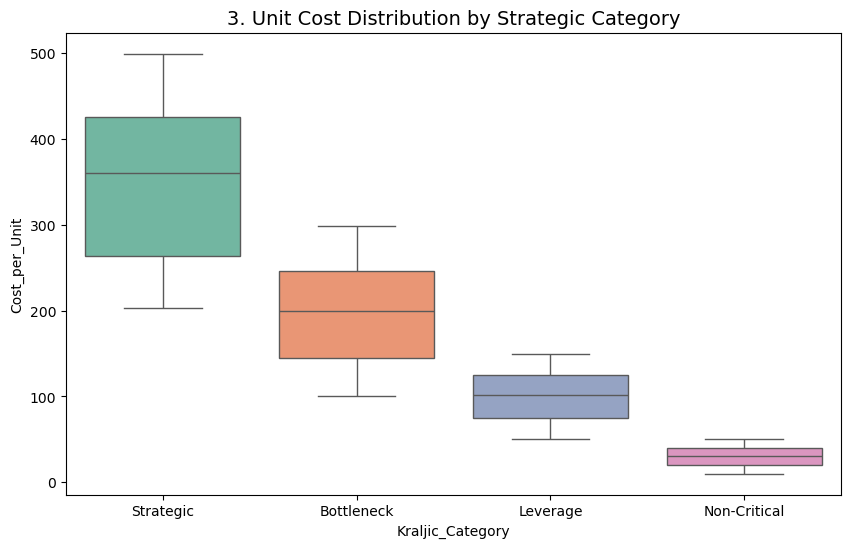

In [47]:
# --- Visualization 3: Cost Analysis per Category ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kraljic_Category', y='Cost_per_Unit', data=df, palette='Set2')
plt.title('3. Unit Cost Distribution by Strategic Category', fontsize=14)
plt.show()

The high cost of Strategic items explains their high 'Profit Impact.' Conversely, the narrow range for Non-Critical items suggests they are standardized commodities where price doesn't vary much between suppliers

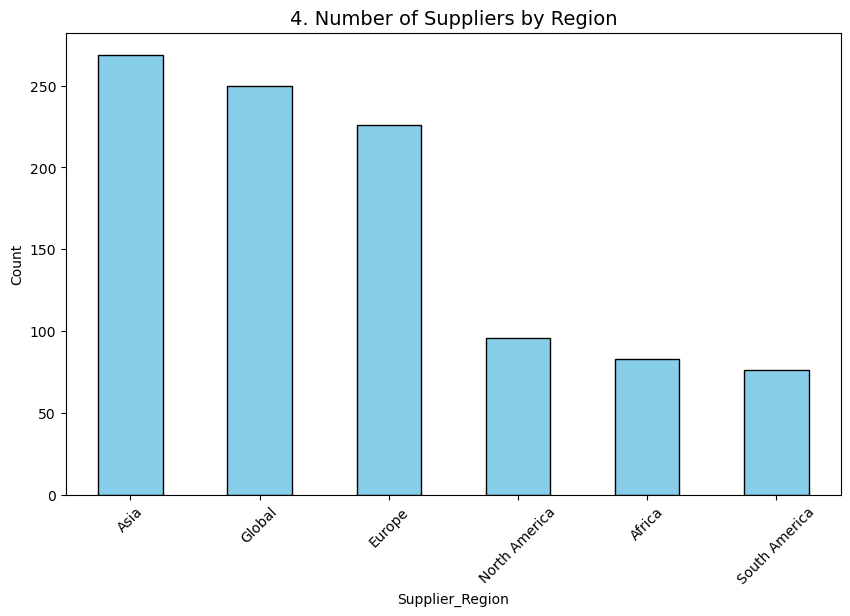

In [48]:
# --- Visualization 4: Geographic Supplier Breakdown ---
plt.figure(figsize=(10, 6))
region_counts = df['Supplier_Region'].value_counts()
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('4. Number of Suppliers by Region', fontsize=14)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This shows where our suppliers are located. Asia is our biggest partner, followed by European and Global suppliers

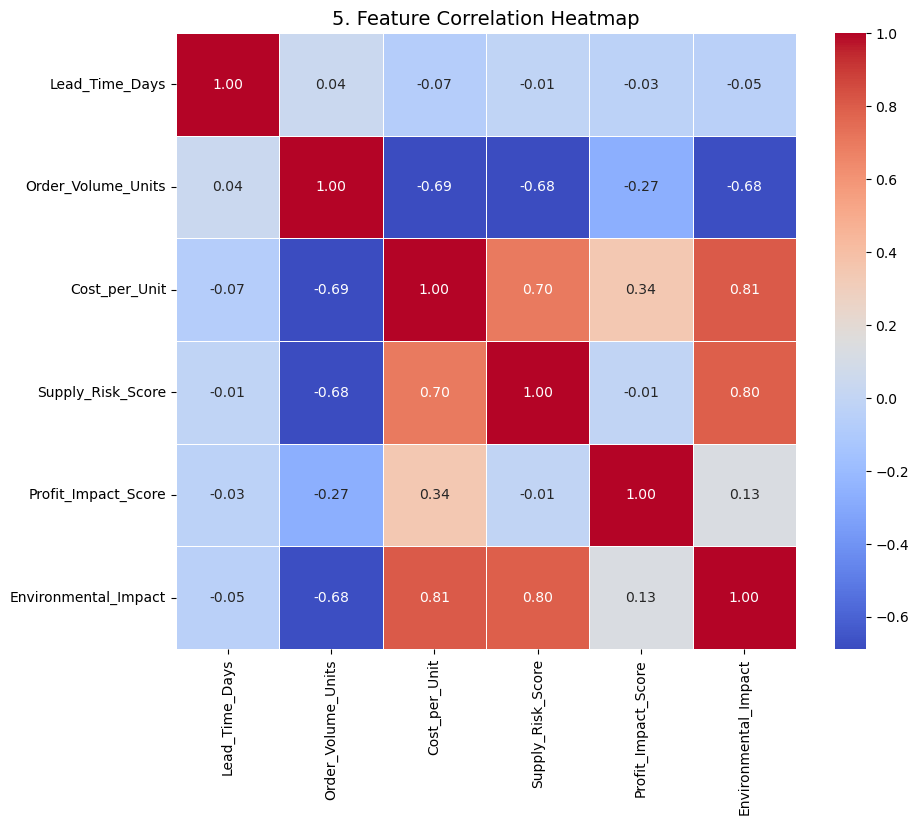

In [49]:
# --- Visualization 5: Correlation Heatmap ---
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('5. Feature Correlation Heatmap', fontsize=14)
plt.show()

This grid shows how different numbers relate to each other. Darker colors mean that when one number goes up, the other usually goes up tooWe see a strong correlation between Cost_per_Unit and Profit_Impact. This confirms that the more expensive a part is, the more it affects our bottom line, which is a key driver for our classification model

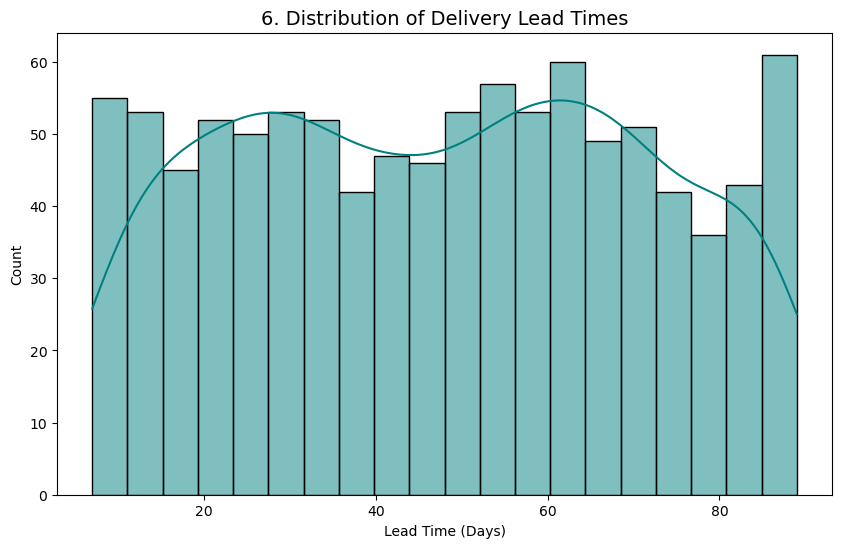

In [50]:
# --- Visualization 6: Lead Time Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df['Lead_Time_Days'], bins=20, kde=True, color='teal')
plt.title('6. Distribution of Delivery Lead Times', fontsize=14)
plt.xlabel('Lead Time (Days)')
plt.show()

This shows how long we usually wait for an order to arrive. Most of our products take about 40 to 60 days to reach us

The Random Forest model predicts a perfectly balanced procurement portfolio where products are precisely categorized based on cost and risk. With 99.6% accuracy, the analysis suggests that the business can effectively automate its strategic sourcing, ensuring that high-value Strategic items are protected while Non-Critical items are handled with maximum efficiency.